### Hair Removal Function


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def remove_hair(image_path):
    # Read image
    src = cv2.imread(image_path)

    # Convert the original image to grayscale
    grayScale = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)

    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1, (17, 17))

    # Perform the blackHat filtering on the grayscale image to find the
    # hair contours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)

    # Intensify the hair contours in preparation for the inpainting
    # algorithm
    ret, thresh2 = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)

    # Inpaint the original image depending on the mask
    dst = cv2.inpaint(src, thresh2, 1, cv2.INPAINT_TELEA)

    # Display the final cleaned image
    # cv2_imshow(dst)

    return dst
#cv2.imwrite('2.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

### Apply function & save preprocessed dataset into drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

os.chdir('/content/drive/MyDrive/FYP/data')
root_directory = os.getcwd() + "/split_data"
output_directory = os.getcwd() + "/preprocessed_split_data"

In [ ]:
import os
from shutil import copyfile
import cv2
from google.colab.patches import cv2_imshow

def process_images(input_folder, output_folder):
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            input_path = os.path.join(root, file)
            output_path = os.path.join(output_folder, os.path.relpath(input_path, input_folder))

            # Create output directory if it doesn't exist
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            # Call your remove_hair function and save the result
            processed_image = remove_hair(input_path)
            cv2.imwrite(output_path, processed_image)

# Create output directories with the same structure as the input
for root, dirs, files in os.walk(root_directory):
    for dir in dirs:
        output_dir = os.path.join(output_directory, os.path.relpath(os.path.join(root, dir), root_directory))
        os.makedirs(output_dir, exist_ok=True)

# Execute the function with your specified directories
process_images(root_directory, output_directory)

### Visualize the hair removal effect with examples

In [ ]:
import matplotlib.pyplot as plt

def display_before_and_after(image_path):
    # Read the original image
    original_image = cv2.imread(image_path)

    # Remove hair from the image
    cleaned_image = remove_hair(image_path)

    # Plotting the images using Matplotlib
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Cleaned Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cleaned_image, cv2.COLOR_BGR2RGB))
    plt.title("Cleaned Image (Hair Removed)")
    plt.axis('off')

    plt.show()

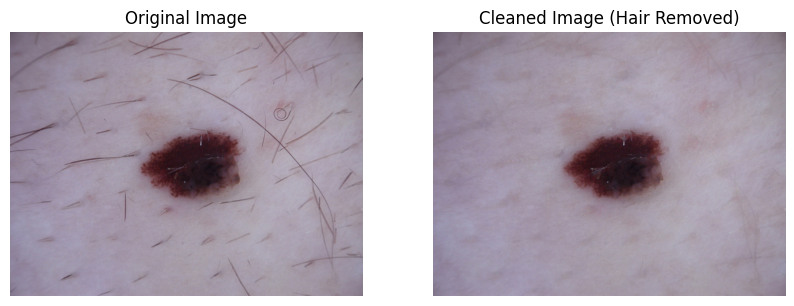

In [ ]:
image1 =  os.getcwd() + "/split_data/train_data/nv/ISIC_0033009.jpg"
display_before_and_after(image1)

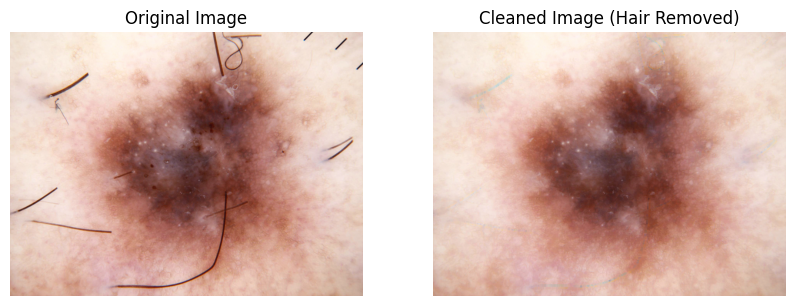

In [ ]:
image2 =  os.getcwd() + "/split_data/train_data/df/ISIC_0029578.jpg"
display_before_and_after(image2)

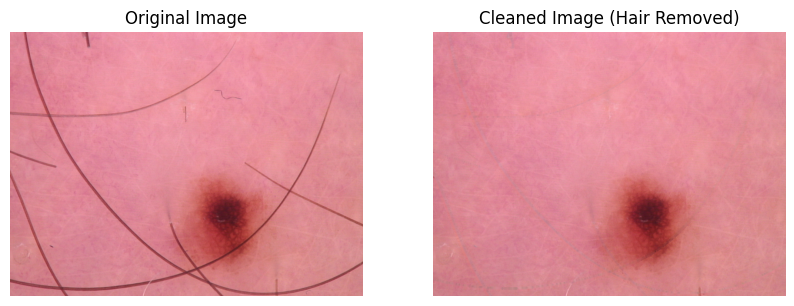

In [ ]:
image3 =  os.getcwd() + "/split_data/test_data/nv/ISIC_0031793.jpg"
display_before_and_after(image3)

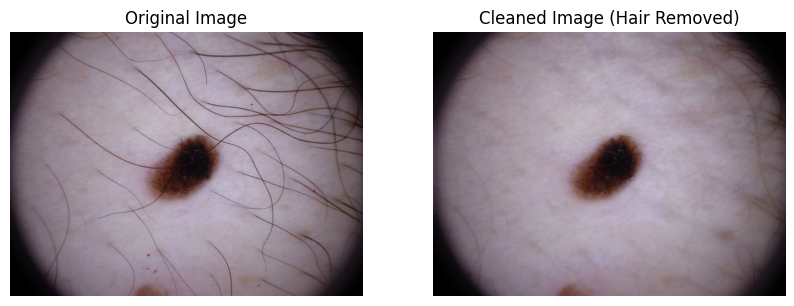

In [ ]:
image4 =  os.getcwd() + "/split_data/test_data/nv/ISIC_0033188.jpg"
display_before_and_after(image4)

### Upload dataset to 🤗 for ViT usage

In [ ]:
import huggingface_hub

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login
notebook_login()


In [ ]:
from datasets import load_dataset

dataset = load_dataset(output_directory)
dataset.push_to_hub("Sharren/processedSkin")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/5128 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/52 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2884 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/29 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/2003 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/21 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/sharren/processedSkin/commit/995e744890ce4cdc643b775ee65f64c83fe68fda', commit_message='Upload dataset', commit_description='', oid='995e744890ce4cdc643b775ee65f64c83fe68fda', pr_url=None, pr_revision=None, pr_num=None)